In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100,2))
X[:, 0] = np.random.uniform(0., 100., size = 100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0., 10., size = 100)
#之所以设置成 线性效果，是因为这样 降维 的效果好

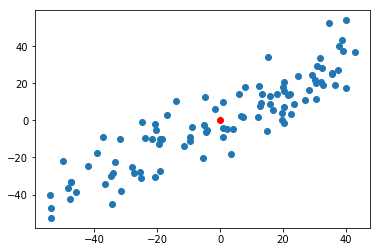

In [3]:
def demean(X):
    return X - np.mean(X, axis = 0) #需要减去的每一列的均值
X_demean = demean(X)
plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.scatter(0,0, color = 'r')
plt.show()
#可见分布的中心 现在在(0,0)

In [6]:
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)

def df(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

def direction(w):
    return w / np.linalg.norm(w) #求模：np.linalg.norm()

def first_component(X, initial_w, eta, n_iters = 1e4, epsilon = 1e-8): #就是之前的gradient_descent()
    w = direction(initial_w)
    cur_iter = 0
    while cur_iter <= n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + (+1) * eta * gradient #注意w必须是单位向量，所以我们每一步循环需要保证w还是单位向量
        w = direction(w) #TODO: 为什么不在gradient = df(w, X) 这一行来进行direction()
        if(abs( f(w, X) - f(last_w, X) ) < epsilon ):
            break
        cur_iter += 1
        
    return w

In [7]:
initial_w = np.random.random(X.shape[1])
eta = 0.01
w = first_component(X, initial_w, eta)
w

array([0.77993472, 0.62586088])

### 如何求出第二主成分

In [8]:
X2 = np.empty(X.shape) #X2是去除掉 第一主成分 后的新数据
for i in range(len(X)):
    norm = X[i].dot(w)
    X2[i] = X[i] - norm * w

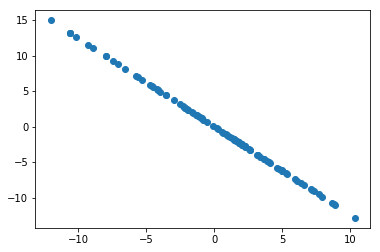

In [9]:
plt.scatter(X2[:, 0], X2[:, 1])
plt.show()

### 观察：
1. 因为只有两个维度，所以去除掉第一个维度，剩下的只有一个维度（即分布都在一条直线上，而不是一个平面上）
2. 第二主成分的轴，你会发现和第一个主成分的轴是垂直的

### 当分布就是在一条直线（一个维度上）的时候，我们的first_component() 求出来的就是这条直线的斜率
1. 一般化（有多个维度）：求出的是第一主成分
2. 特殊（只有一个维度）：求得就是斜率
3. 例子见下：

In [10]:
w2 = first_component(X2, initial_w, eta) 
w2

array([-0.62585729,  0.77993759])

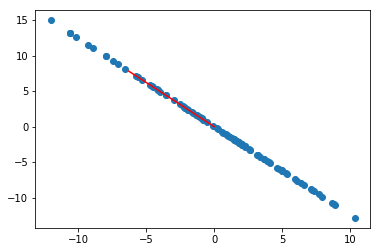

In [12]:
plt.scatter(X2[:, 0], X2[:, 1])
plt.plot([0, w2[0]*10],[0, w2[1]*10], color = 'r')
plt.show()

### w1 和 w2 是垂直关系

In [14]:
w.dot(w2) #几乎等于0

4.598973474878587e-06

### 用向量化方法：减去第一主成分

In [19]:
print(X.dot(w).shape) #是向量，需要变成矩阵 X.dot(w).reshape(-1, 1)
print(X.dot(w).reshape(-1,1).shape)
X2 = X - X.dot(w).reshape(-1,1) * w

(100,)
(100, 1)


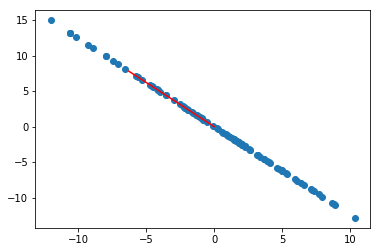

In [21]:
w2 = first_component(X2, initial_w, eta) 

plt.scatter(X2[:, 0], X2[:, 1])
plt.plot([0, w2[0]*10],[0, w2[1]*10], color = 'r')
plt.show()

In [22]:
w.dot(w2) #几乎等于0

4.598973474878587e-06

### 求出前n个主成分

In [33]:
def first_n_components(n, X, eta = 0.01, n_iters = 1e4, epsilon = 1e-8):
    assert n > 0 and n <= X.shape[0], "N is invalid"
    X_pca = X.copy() #最好不要破坏传入的数据！否则传入的数据会被更改
    X_pca = demean(X_pca)
    res = []
    for i in range(n):
        initial_w = np.random.random(X_pca.shape[1])
        w = first_component(X_pca, initial_w, eta)
        res.append(w)        
        X_pca = X_pca - X_pca.dot(w).reshape(-1,1) * w
    return res

In [34]:
w1, w2 = first_n_components(2, X)

In [30]:
w1.dot(w2)

5.006082781866539e-06